# 题目
两个圆 l 和 m，相交于 P 和 Q，过 P 一条直线，使得直线被两圆所截得线段等长（该直线不是 PQ）

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np 
import math 

# 假设圆 l, m 的半径为 rl = 3, rm = 5。 两个圆圆心之间的距离 dlm = 6
# 先绘制出这两个圆。

rl=3
rm=5
dlm = 5
xl = rl
yl = 0
xm = xl+4
ym = yl+3

fig = plt.figure()
ax = fig.add_subplot(111)

cirl = Circle(xy = (xl, yl), radius=rl, edgecolor="b", facecolor="none", linewidth=1.0)
cirm = Circle(xy = (xm, ym), radius=rm, edgecolor="r", facecolor="none", linewidth=1.0)
ax.add_patch(cirl)
ax.add_patch(cirm)

plt.plot(xl, yl, "yo", ms=3.0)
plt.plot(xm, ym, "yo", ms=3.0)

plt.axis("equal")
plt.grid()

# plt.show()

In [2]:
# 计算 P 和 Q 两个交点的坐标

def drawPQ():
    
    for xp in np.arange(0, 2*rl+0.0001, 0.0001):
        xp = round(xp,4)   #  存在浮点数运算时的失真问题
        yp = ((rl**2)-(xp-rl)**2)**(1/2)
        yp = round(yp, 4)
        if round(((xp-xm)**2+(yp-ym)**2)**(1/2), 3) == rm:
            ax.plot(xp, yp, "go", ms=5.0)
            print([xp, yp])
            break; 
        elif round(((xp-xm)**2+(-yp-ym)**2)**(1/2), 3) == rm:
            ax.plot(xp, -yp, "go", ms=5.0)
            print([xp, -yp])
            yp = -yp
            break;
    for xq in np.arange(xp+0.001, 2*rl+0.0001, 0.0001):
        xq = round(xq,4)   #  存在浮点数运算时的失真问题
        yq = ((rl**2)-(xq-rl)**2)**(1/2)
        yq = round(yq, 4)
       # print(round(((xq-xm)**2+(-yq-ym)**2)**(1/2), 4))
       # print([xq,yq])
        if round(((xq-xm)**2+(yq-ym)**2)**(1/2), 3) == rm:
            ax.plot(xq, yq, "go", ms=5.0)
            print([xq, yq])
            return xp, yp, xq, yq
        elif round(((xq-xm)**2+(-yq-ym)**2)**(1/2), 3) == rm:
            ax.plot(xq, -yq, "go", ms=5.0)
            print([xq, -yq])
            yq = -yq
            return xp, yp, xq, yq
    return False

xp, yp, xq, yq = drawPQ()

[2.0024999999999999, 2.8292999999999999]
[5.4368999999999996, -1.7497]


In [3]:
# plt.show()

In [4]:
pl_2 = (yp-yl)**2+(xp-xl)**2
pm_2 = (yp-ym)**2+(xp-xm)**2
dlm_2 = dlm**2
pl = pl_2**(1/2)
pm = pm_2**(1/2)

cos_l = (pl_2+dlm_2-pm_2) / (2*pl*dlm) 
cos_p = (pl_2+pm_2-dlm_2) / (2*pl*pm)
cos_m = (pm_2+dlm_2-pl_2) / (2*pm*dlm)

theta_l = np.arccos(cos_l)
theta_p = np.arccos(cos_p)
theta_m = np.arccos(cos_m)

print(theta_l/np.pi*180)
print(theta_p/np.pi*180)
print(theta_m/np.pi*180)

72.5507501146
72.5356481096
34.9136017759


In [5]:
def calc_dl_dm():
    for agl_l in np.arange(0, 2*np.pi, 0.0001):
        agl_m = np.pi - agl_l - theta_p
        dl = round(rl * np.cos(agl_l), 3)
        dm = round(rm * np.cos(agl_m), 3)
      #  print([agl_l/np.pi*180, dl, agl_m/np.pi*180, dm])
        if dl == dm and dl > 0:
            print([agl_l, agl_m])
            return agl_l, agl_m
    return 0, 0

angle_l, angle_m = calc_dl_dm()

[0.75630000000000008, 1.1193067690098464]


In [6]:
def clac_new_l():
    for new_xl in np.arange(0, 2*rl+0.0002,0.0002):
        new_xl = round(new_xl,4)
        new_yl = ((rl**2)-(new_xl-xl)**2)**(1/2)
        new_yl = round(new_yl,4)
        d_new_p_2_1 = (new_yl-yp)**2+(new_xl-xp)**2
        d_new_l_2_1 = (new_yl-yl)**2+(new_xl-xl)**2
        d_new_p_2_2 = (-new_yl-yp)**2+(new_xl-xp)**2
        d_new_l_2_2 = (-new_yl-yl)**2+(new_xl-xl)**2    
        d_new_p_1 = d_new_p_2_1**(1/2)
        d_new_l_1 = d_new_l_2_1**(1/2)
        d_new_p_2 = d_new_p_2_2**(1/2)
        d_new_l_2 = d_new_l_2_2**(1/2)    
        cos_new_l_1 = (d_new_p_2_1+pl_2-d_new_l_2_1) / (2*d_new_p_1*pl)
        cos_new_l_2 = (d_new_p_2_2+pl_2-d_new_l_2_2) / (2*d_new_p_2*pl)
        if round(cos_new_l_1,4) == round(np.cos(angle_l), 4):
            print(cos_new_l_1)
            ax.plot(new_xl, new_yl, "ro", ms=5.0)
            ax.plot([new_xl, xp],[new_yl, yp],linestyle='--', color="b")
            print([new_xl, new_yl])
            return new_xl, new_yl;
        elif round(cos_new_l_2,4) == round(np.cos(angle_l), 4):
            print(cos_new_l_2)
            new_yl = -new_yl
            ax.plot(new_xl, new_yl, "ro", ms=5.0)
            ax.plot([new_xl, xp],[new_yl, yp],linestyle='--', color="b")
            print([new_xl, new_yl]) 
            
            return new_xl, new_yl;          
    return False

clac_new_l()

0.727407745528
[0.2336, -1.1606000000000001]


(0.2336, -1.1606000000000001)

In [7]:
def clac_new_m():
    for new_xm in np.arange(xm-rm, xm+rm+0.0001,0.0001):
        new_xm = round(new_xm,4)
        new_ym = ((rm**2)-(new_xm-xm)**2)**(1/2) + ym
        new_ym = round(new_ym,4)
        new_ym_2 = -(((rm**2)-(new_xm-xm)**2)**(1/2)) + ym
        new_ym_2 = round(new_ym_2,4)
        d_new_p_2_1 = (new_ym-yp)**2+(new_xm-xp)**2
        d_new_m_2_1 = (new_ym-ym)**2+(new_xm-xm)**2
        d_new_p_2_2 = (new_ym_2-yp)**2+(new_xm-xp)**2
        d_new_m_2_2 = (new_ym_2-ym)**2+(new_xm-xm)**2    
        d_new_p_1 = d_new_p_2_1**(1/2)
        d_new_m_1 = d_new_m_2_1**(1/2)
        d_new_p_2 = d_new_p_2_2**(1/2)
        d_new_m_2 = d_new_m_2_2**(1/2)    
        cos_new_m_1 = (d_new_p_2_1+pm_2-d_new_m_2_1) / (2*d_new_p_1*pm)
        cos_new_m_2 = (d_new_p_2_2+pm_2-d_new_m_2_2) / (2*d_new_p_2*pm)
     #   print([new_xm,new_ym, cos_new_m_1, angle_m])
        if round(cos_new_m_1,3) == round(np.cos(angle_m), 3):
            print(cos_new_m_1)
            ax.plot(new_xm, new_ym, "ro", ms=5.0)
            ax.plot([new_xm, xp],[new_ym, yp],linestyle='--', color="b")
            print([new_xm, new_ym])
            return new_xm, new_ym;
        elif round(cos_new_m_2,3) == round(np.cos(angle_m), 3):
            print(cos_new_m_2)
            ax.plot(new_xm, -new_ym, "ro", ms=5.0)
            ax.plot([new_xm, xp],[new_ym, yp],linestyle='--', color="b")
            print([new_xm, -new_ym]) 
            return new_xm, -new_ym;          
    return False

clac_new_m()

0.435508442151
[3.7639999999999998, 6.8116000000000003]


(3.7639999999999998, 6.8116000000000003)

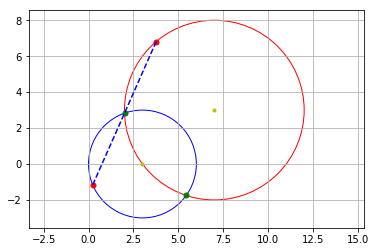

In [8]:
plt.show()